In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from xgboost import XGBClassifier

from training_utils import prepare_dataset, print_metrics

random_seed = 42

In [2]:
Xtrain, ytrain, Xval, yval, sample_weight = prepare_dataset()
print(f"Training samples: {Xtrain.shape[0]}, Validation samples: {Xval.shape[0]}")

Training samples: 4976, Validation samples: 247


In [4]:
param_grid = {
    'n_estimators': range(50, 301, 50),   
    'max_depth': range(3, 8),              
    'learning_rate': [0.01, 0.05, 0.1],
}

best_accuracy = 0
best_params = None

for params in ParameterGrid(param_grid):
    clf = XGBClassifier(random_state=random_seed, n_jobs=-1, **params)
    clf.fit(
        Xtrain, ytrain, sample_weight=sample_weight,
        eval_set=[(Xval, yval)],
        verbose=False
    )
    
    yval_pred = clf.predict(Xval)
    accuracy = accuracy_score(yval, yval_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
Best Validation Accuracy: 0.7004048582995951


Accuracy: 0.7004048582995951
Confusion Matrix:
[[90 31]
 [43 83]]
F1 Score: 0.6916666666666667
Best Threshold (Youden's J statistic): 0.5514281392097473


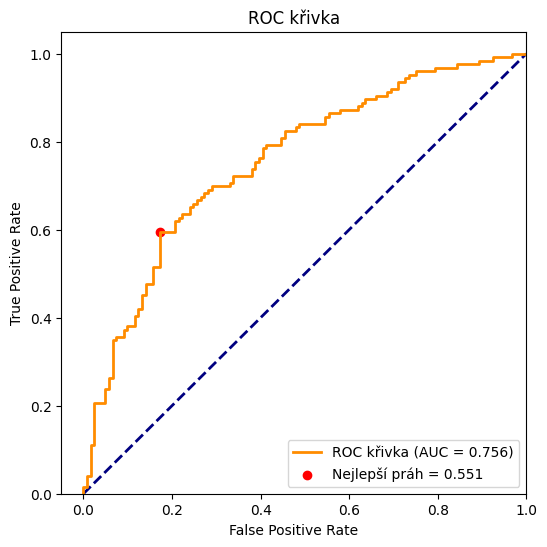

In [5]:
model = XGBClassifier(random_state=random_seed, n_jobs=-1, **best_params)
model.fit(Xtrain, ytrain, sample_weight=sample_weight)
yval_prob = model.predict_proba(Xval)[:, 1]
yval_pred = model.predict(Xval)
print_metrics(yval, yval_pred, yval_prob)